In [ ]:
# !wget https://pjreddie.com/media/files/mnist_test.csv

In [ ]:
# Sample Example using The Dataser Class
import numpy as np
from torch.utils.data import Dataset

In [ ]:
class ExampleDataset(Dataset):
  def __init__(self, data):
    self.data = data 
  
  def __len__(self):
    return len(self.data)
  
  def __getitem__(self, index): 
    return self.data[index]

In [ ]:
sample_data = np.arange(0,10)
dataset = ExampleDataset(sample_data)
print(len(dataset))
print(dataset[2])
print(dataset[0:5])

10
2
[0 1 2 3 4]


import libraries

In [ ]:
import pandas as pd
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 

from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [ ]:
df_test = pd.read_csv('mnist_test.csv')
test_img = df_test.iloc[:,1:]
test_lab = df_test.iloc[:0]
print(df_test.shape)
print(test_img.shape)
print(test_lab.shape)

FileNotFoundError: ignored

In [ ]:
transform = transforms.Compose(
    [transforms.ToPILImage(),
     transforms.ToTensor(),
     transforms.Normalize((0.5, ), (0.5, ))
])

In [ ]:
class MNISTDataset(Dataset):
    def __init__(self, images, labels=None, transforms=None):
        self.X = images
        self.y = labels
        self.transforms = transforms
         
    def __len__(self):
        return (len(self.X))
    
    def __getitem__(self, i):
        data = self.X.iloc[i, :]
        data = np.asarray(data).astype(np.uint8).reshape(28, 28, 1)
        
        if self.transforms:
            data = self.transforms(data)
            
        if self.y is not None:
            return (data, self.y[i])
        else:
            return data

In [ ]:
test_data = MNISTDataset(test_img, test_lab, transform)
testloader = DataLoader(test_data, batch_size=4, shuffle=True)

Load CIFAR10 data using custom Dataset

In [ ]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
from PIL import Image
import torch

In [ ]:
data_path = 'data/'
!wget -nc -P data/ https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
def untar(file, path):
  import tarfile
  cifar_tar = tarfile.open(file)
  cifar_tar.extractall(path)
  cifar_tar.close()

data_file = data_path + 'cifar-10-python.tar.gz'
untar(data_file, data_path)

File ‘data/cifar-10-python.tar.gz’ already there; not retrieving.



In [ ]:
# Step 2: create support functions 
def unpickle(file):
    with open(file, 'rb') as fo:
        dic = pickle.load(fo, encoding='latin1')
        data = dic['data']
        data = np.array(data)
        labels = dic['labels']
        labels = np.array(labels)
    return data, labels
def label_name(n):
    names = ['airplane', 'automobile', 'bird', 'cat',
             'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  
    return names[n]

In [ ]:
# load files 
path = './data/cifar-10-batches-py/'
data = np.empty((0, 3072))
target = np.array((), int)
for f in range(1, 6):
  img, label = unpickle(path + f'data_batch_{f}')
  data = np.concatenate([data, img])
  target = np.concatenate([target, label])
print(data.shape)
print(target.shape)

(50000, 3072)
(50000,)


In [ ]:
def return_photo(batch_file):
    dim = np.sqrt(1024).astype(int)
    r = batch_file[:, 0:1024].reshape(batch_file.shape[0], dim, dim, 1)
    g = batch_file[:, 1024:2048].reshape(batch_file.shape[0], dim, dim, 1)
    b = batch_file[:, 2048:3072].reshape(batch_file.shape[0], dim, dim, 1)
    photo = np.concatenate([r,g,b], -1)
    return photo

In [ ]:
data = return_photo(data)

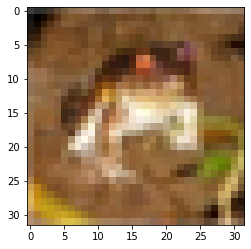

In [ ]:
img_sample = data[0]/255.
img_sample = np.reshape(img_sample, (32,32,3))
plt.imshow(img_sample)
plt.show()

In [ ]:
class CIFAR10_loader(Dataset):
    def __init__(self,root,train=True,transform = None):
      self.root = root 
      self.train = train 
      self.transform = transform
      self.data = np.empty((0, 3072), int)
      self.target = np.array((), int)
      for f in range(1, 6):
        img, label = unpickle(path + f'data_batch_{f}')
        self.data = np.concatenate([self.data, img])
        self.target = np.concatenate([self.target, label])
      self.data = self.data.reshape((len(self.data), 3, 32, 32)).transpose(0, 2, 3, 1)
      
    def __len__(self):
      return len(self.data)

    def __getitem__(self, item):
      img = self.data[item]/255.
      img = Image.fromarray((img * 255).astype(np.uint8))
      target = self.target[item]
      if self.transform:
        img = self.transform(img)
      return img, target

In [ ]:
transform = transforms.Compose([
    transforms.RandomAffine(45),
    transforms.RandomRotation(45, resample=False, expand=False, center=None, fill=None)])

In [ ]:
path = './data/cifar-10-batches-py/'
data = CIFAR10_loader(root=path, transform=transform)

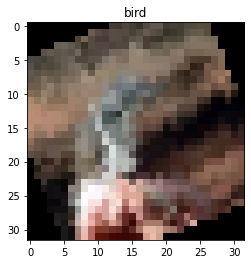

In [ ]:
pick = np.random.randint(0,len(data)+1)
plt.imshow(data[pick][0])
plt.title(label_name(data[pick][1]))
plt.show()

In [ ]:
trainloader = DataLoader(data, batch_size=4,
                                          shuffle=True, num_workers=2)

In [ ]:
for data in trainloader:
  print(data)
  break

[tensor([[208, 208, 208,  ...,  17,  26,  33],
        [ 21,  24,  37,  ...,   3,   7,  23],
        [ 79,  70,  52,  ..., 113, 103,  86],
        [  8,   6,   7,  ...,  33,  33,  40]]), tensor([5, 4, 4, 2])]
